## Import Libraries

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# Craet a function to plot the cinfusion matrix

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

# Reading the data

In [4]:
data = pd.read_csv("dataset_part_2.csv")
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
X = pd.read_csv('dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,5.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15600.000000,3,5.0,7,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15600.000000,6,5.0,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15600.000000,3,5.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
y=data['Class'].to_numpy()

# Scaling the data

In [7]:
# students get this 
transform = preprocessing.StandardScaler()
X_scaled=transform.fit_transform(X)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=2)

In [9]:
y_test.shape

(18,)

# Logestic Regression

In [10]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr=LogisticRegression()


In [11]:
logreg_cv=GridSearchCV(estimator=lr,param_grid=parameters,cv=10,scoring='accuracy')
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [12]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [13]:
logreg_best_estimator=logreg_cv.best_estimator_
logreg_best_estimator

LogisticRegression(C=0.01)

In [14]:
from sklearn.metrics import accuracy_score
y_pred_logreg=logreg_cv.predict(X_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_logreg).round(4)))


Accuracy Score :0.8333


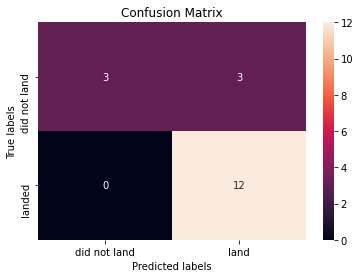

In [15]:
plot_confusion_matrix(y_test,y_pred_logreg)

# Support Vector Machine

In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [17]:
svm_cv=GridSearchCV(estimator=svm,param_grid=parameters,cv=10,scoring='accuracy')
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [18]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8357142857142856


In [19]:
svm_best_estimator=svm_cv.best_estimator_
svm_best_estimator

SVC(C=0.03162277660168379, gamma=0.001, kernel='linear')

In [20]:
y_pred_svm=svm_cv.predict(X_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_svm).round(4)))


Accuracy Score :0.8333


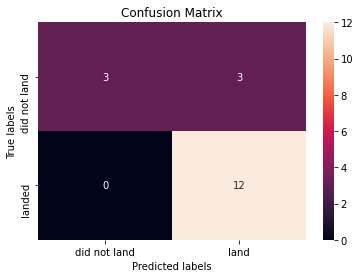

In [21]:
plot_confusion_matrix(y_test,y_pred_svm)

# Decision Tree

In [39]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [45]:
tree_cv=GridSearchCV(estimator=tree,param_grid=parameters,cv=10,scoring='accuracy')
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [46]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8732142857142857


In [47]:
tree_best_estimator=tree_cv.best_estimator_

In [48]:
y_pred_tree=tree_best_estimator.predict(X_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_tree).round(4)))


Accuracy Score :0.9444


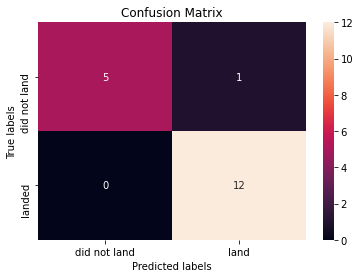

In [49]:
plot_confusion_matrix(y_test,y_pred_tree)

# K Nearest Neighbor

In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [29]:
knn_cv=GridSearchCV(estimator=KNN,param_grid=parameters,cv=10,scoring='accuracy')
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [31]:
knn_best_estimator=knn_cv.best_estimator_

In [32]:
y_pred_knn=knn_best_estimator.predict(X_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_knn).round(4)))

Accuracy Score :0.8333


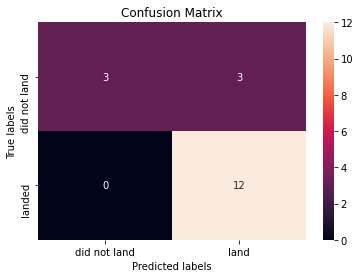

In [33]:
plot_confusion_matrix(y_test,y_pred_knn)

# the method performs best using test data

In [50]:
best_algorithm={'name':['Logistic Regression','Support Vector Machine','Decision Tree','K nearest neighbor'],
                       'scoring':[logreg_cv.best_score_,svm_cv.best_score_,tree_cv.best_score_,knn_cv.best_score_]}

In [52]:
best_algorithm_df=pd.DataFrame(best_algorithm)
best_algorithm_df.sort_values(by='scoring',ascending=False)

,name,scoring
2,Decision Tree,0.873214
3,K nearest neighbor,0.848214
0,Logistic Regression,0.846429
1,Support Vector Machine,0.835714


the method performs best using test data is Decision Tree	